# Data Exploration

author = Caroline Magg <br>
date = 31 March 2020 <br>

___________________________________
history: <br>
2020-03-31 <br>
inspect single folder content <br>
write methods for reading structure, contour names and contour content <br>
2020-04-02 <br>
generate list of contours <br>
2020-04-12 <br>
change utils_read to utils_explore and adapt to folderstructure
2020-09-16 <br>
generate list of contours for all folders <br>

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import pydicom
import vtk

In [2]:
%matplotlib inline

### Add paths and dependencies
This can vary depending on your environment

In [3]:
# add KidsBrainProject main folder to paths
sys.path.append(os.path.abspath('../../'))
sys.path.append(os.path.abspath('../utils/'))

In [4]:
# add path to data here
path_data = "../../Data/" 

In [5]:
from utils_explore import read_structure,read_contour,read_contour_names,read_contour_row

# Inspect single folder content

In [6]:
idx = 1
folder_name = os.path.join(path_data, str(idx))
folder = os.listdir(folder_name)
folder

['CT',
 'RD.Jacks1IMPT.dcm',
 'RD.Jacks1IMPTb.dcm',
 'RS.Jacks1.dcm',
 'Segmentation',
 'T1 +C 3-15-16',
 'T1 +C 3-23-16',
 'T1 +C 4-29-16',
 'T2 CISS 3-15-16',
 'T2 CUBE 4-29-16']

### CT

In [7]:
folder_ct_name = os.path.join(path_data, str(idx),'CT')
folder_ct = os.listdir(folder_ct_name)
folder_ct[:5]

['CT.1.1.dcm', 'CT.1.10.dcm', 'CT.1.100.dcm', 'CT.1.101.dcm', 'CT.1.102.dcm']

In [8]:
df_ct = read_structure(folder_ct_name)
len(df_ct)

292

### MRI

In [9]:
folder_mri_name = os.path.join(path_data, str(idx),'T1 +C 3-15-16')
folder_mri = os.listdir(folder_mri_name)
folder_mri[:5]

['MR.1.1.dcm', 'MR.1.10.dcm', 'MR.1.100.dcm', 'MR.1.101.dcm', 'MR.1.102.dcm']

In [10]:
df_mri = read_structure(folder_mri_name)
len(df_mri)

292

### Contours

In [11]:
path_contours = os.path.join(path_data, str(idx), 'RS.Jacks1.dcm')

In [12]:
df_contours = read_contour_names(path_contours)
len(df_contours)

number of ROIs 104


104

In [13]:
contours = read_contour(path_contours, df_contours)
len(contours)

number of ROIs 104
0 Body
number of contour 293
1 Brain
number of contour 177
2 Brainstem
number of contour 51
3 BrainstemCore
number of contour 51
4 BrainstemSurf
number of contour 102
5 BrainSupraTent
number of contour 248
6 CochleaLt
number of contour 5
7 CochleaRt
number of contour 4
8 CTV
number of contour 38
9 GTV
number of contour 34
10 HippoHeadLt
number of contour 17
11 HippoHeadRt
number of contour 16
12 HippoTailLt
number of contour 21
13 HippoTailRt
number of contour 21
14 Hypothalamus
number of contour 20
15 LacrimalLt
number of contour 17
16 LacrimalRt
number of contour 19
17 LensLt
number of contour 9
18 LensRt
number of contour 8
19 MastoidLt
number of contour 36
20 MastoidRt
number of contour 37
21 NonTargetBody
number of contour 337
22 NonTargetBrain
number of contour 194
23 NPX
number of contour 16
24 OpticChiasm
number of contour 3
25 OpticNerveLt
number of contour 16
26 OpticNerveRt
number of contour 14
27 Pituitary
number of contour 4
28 zPlanBody
number of contou

5973

# Inspect 20 folders and generate contours list

In [14]:
contours_all = []
for idx in range(1,21):
    folder_name = os.path.join(path_data, str(idx))
    rs_file = [x for x in os.listdir(folder_name) if 'RS' in x]    
    path_contours = os.path.join(path_data, str(idx), rs_file[0])
    contours_all.append(read_contour_names(path_contours))
len(contours_all)

number of ROIs 104
number of ROIs 87
number of ROIs 97
number of ROIs 95
number of ROIs 84
number of ROIs 85
number of ROIs 90
number of ROIs 94
number of ROIs 92
number of ROIs 84
number of ROIs 96
number of ROIs 92
number of ROIs 90
number of ROIs 91
number of ROIs 92
number of ROIs 92
number of ROIs 93
number of ROIs 90
number of ROIs 87
number of ROIs 92


20

In [15]:
df_all = pd.DataFrame(columns=['ID','RoiNumber','RoiName','Count'])
for i in range(len(contours_all)):
    df_single = contours_all[i]
    for j in range(len(df_single)):
        row = df_single.loc[j]
        if row['RoiName'] not in df_all['RoiName'].values:
            row['Count'] = [i+1]
            df_all = df_all.append(row)
        else:
            idx = np.where(df_all['RoiName'] == row['RoiName'])[0][0]
            row = df_all.iloc[idx]
            row['Count'].append(i+1)

In [16]:
len(df_all)

298

In [17]:
df_all

,ID,RoiNumber,RoiName,Count
0,0,29,Body,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15..."
1,1,1,Brain,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
2,2,28,Brainstem,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
3,3,3,BrainstemCore,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
4,4,4,BrainstemSurf,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
...,...,...,...,...
40,40,43,RMP,[20]
41,41,44,RMA,[20]
42,42,45,RIM,[20]
56,56,59,Dose 104b[%],[20]


In [18]:
np.unique(df_all['RoiName'])

array(['ACL', 'Amydala L', 'Amydala R', 'Amydgala L', 'Amydgala LEFT',
       'Amydgala R', 'Amydgala left', 'Amydgala right', 'Amygdala L',
       'Amygdala R', 'Amygdala left', 'Amygdala right', 'Ant Thalamus L',
       'Ant Thalamus R', 'AntThalamus L', 'AntThalamus R', 'BODY', 'BOS',
       'Body', 'Body-CTV', 'Brain', 'Brain-CTV', 'BrainInfratent',
       'BrainSupraTent', 'Brainstem', 'BrainstemCore', 'BrainstemSurf',
       'C INF', 'C POST', 'C1', 'C1 L', 'C1A', 'C1P', 'C2', 'C3', 'CG L',
       'CG R', 'CTV', 'CTV1', 'CTV2', 'Cerebel ANT YL', 'CerebelL ANT YL',
       'Cerebell  ANT YL', 'Cerebell ANT YL', 'Cerebell POST YL',
       'Cerebell YL', 'Cerebellum', 'Cerebellum Jacks', 'Cerebellum YL',
       'Cerebellum ant', 'Cerebellum ant1', 'Cerebellum post',
       'CerebellumAnt LT', 'CerebellumJacks', 'Cingulum L', 'Cingulum L2',
       'Cingulum R', 'Cingulum left', 'Cingulum right',
       'Circuit of papez', 'Clips Air', 'Clips Tissue', 'CochleaLt',
       'CochleaRt', '

In [19]:
df_all.to_csv('all_unique_contours_all_folders.csv',index=False, sep=';')

### Make overview of occurrence for report

In [38]:
counts = [len(x) for x in df_all['Count'].values]

In [50]:
h = np.histogram(counts, bins=range(1,22))
h, len(h[0]), len(h[1])

((array([149,  16,  10,  11,   7,   5,   2,   1,   8,  25,   3,   3,   1,
           1,   5,   3,   2,   3,   4,  39], dtype=int64),
  array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21])),
 20,
 21)

In [51]:
for c, o in zip(h[0], h[1]):
    print(o, c)

1 149
2 16
3 10
4 11
5 7
6 5
7 2
8 1
9 8
10 25
11 3
12 3
13 1
14 1
15 5
16 3
17 2
18 3
19 4
20 39


In [52]:
h

(array([149,  16,  10,  11,   7,   5,   2,   1,   8,  25,   3,   3,   1,
          1,   5,   3,   2,   3,   4,  39], dtype=int64),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21]))

In [53]:
149+16+10+11+7

193

In [54]:
43+3+2

48

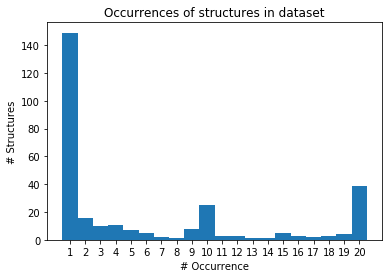

In [57]:
plt.hist(counts, bins=range(1,22))
plt.xticks([x+0.5 for x in list(range(1,21))],range(1,22))
plt.xlabel('# Occurrence')
plt.ylabel('# Structures')
plt.title('Occurrences of structures in dataset')
plt.show()